In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import datetime
from sklearn.datasets import make_regression

In [2]:
# Check the Python version
import sys
if sys.version.startswith("3."):
  print("You are running Python 3. Good job :)")
else:
  print("This notebook requires Python 3.\nIf you are using Google Colab, go to Runtime > Change runtime type and choose Python 3.")

You are running Python 3. Good job :)


# Load the data

Generate a random regression problem. `xstar` is the true solution of the underlying linear model.

In [3]:
A, b, xstar = make_regression(n_samples=10000, n_features=10, coef=True)

In [4]:
print('Number of samples n = ', b.shape[0])
print('Dimension of each sample d = ', A.shape[1])

Number of samples n =  10000
Dimension of each sample d =  10


# Least Squares Estimation
Least squares estimation is one of the fundamental machine learning algorithms. Given an $ n \times d $ matrix $A$ and a $ n \times 1$ vector $b$, the goal is to find a vector $x \in \mathbb{R}^d$ which minimizes the objective function $$f(x) = \frac{1}{2n} \sum_{i=1}^{n} (a_i^\top x - b_i)^2 = \frac{1}{2n} \|Ax - b\|^2 $$

In this exercise, we will try to fit $x$ using Least Squares Estimation. 

One can see the function is $L$ smooth with $L =\frac1n\|A^T A\|  = \frac1n\|A\|^2$ (Lemma 2.3 for the first equality, and a few manipulations for the second).

# Computing the Objective Function
Fill in the `calculate_objective` function below:

In [5]:
def calculate_objective(b, A, x):
    """Calculate the mean squared error for Ax - b."""

    # computing the prediction
    y_pred = np.dot(A, x)
    # subtract the differences
    diff = np.subtract(y_pred, b)
    # return MSE
    return np.square(diff).mean()

# Compute smoothness constant $L$

To compute the spectral norm of A you can use np.linalg.norm(A, 2)

In [6]:
def calculate_L(b, A):
    """Calculate the smoothness constant for f"""

    # compute ||A.T*A||
    AtA = np.matmul(A.T, A)
    AtA_norm = np.linalg.norm(AtA)

    # compute L = smoothness constant of f
    L = (1/len(A)) * AtA_norm
    return L

# Gradient Descent

Please fill in the functions `compute_gradient` below:

In [7]:
def compute_gradient(b, A, x):
    """Compute the gradient."""

    # computing the prediction
    h = np.dot(A, x)
    #  compute gradient
    grad = 2 * np.dot(A.T, (h - b)) / len(b)

    return grad

Please fill in the functions `gradient_descent` below:

In [8]:
def gradient_descent(b, A, initial_x, max_iters, gamma):
    """Gradient descent algorithm."""
    # store iterates and objective func. values
    xs = [initial_x]
    objectives = []
    x = initial_x
    for n_iter in range(max_iters):
        # compute gradient and objective function
        grad = compute_gradient(b, A, x)
        obj = calculate_objective(b, A, x)
        # update x by a gradient descent step
        x = x - (gamma * grad)
        # store x and objective function value
        xs.append(x)
        objectives.append(obj)
        print("Gradient Descent({bi}/{ti}): objective={l}".format(
              bi=n_iter, ti=max_iters - 1, l=obj))

    return objectives, xs

# Running gradient descent

## Naive step size rule

In [9]:
# Define the parameters of the algorithm.
max_iters = 50

gamma = 0.1

# Initialization
x_initial = np.zeros(A.shape[1])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_naive, xs_naive = gradient_descent(b, A, x_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): objective=42450.95346075453
Gradient Descent(1/49): objective=27457.85038153901
Gradient Descent(2/49): objective=17767.000589695814
Gradient Descent(3/49): objective=11500.806592779669
Gradient Descent(4/49): objective=7447.441403129726
Gradient Descent(5/49): objective=4824.45683109983
Gradient Descent(6/49): objective=3126.4402379609005
Gradient Descent(7/49): objective=2026.7957320138044
Gradient Descent(8/49): objective=1314.394305051688
Gradient Descent(9/49): objective=852.6971769053755
Gradient Descent(10/49): objective=553.3692495054571
Gradient Descent(11/49): objective=359.23924704349145
Gradient Descent(12/49): objective=233.29131034555874
Gradient Descent(13/49): objective=151.55030182936582
Gradient Descent(14/49): objective=98.48178218151715
Gradient Descent(15/49): objective=64.01668841397027
Gradient Descent(16/49): objective=41.62613191969677
Gradient Descent(17/49): objective=27.07520600507658
Gradient Descent(18/49): objective=17.616013877145

## Assuming bounded gradients
If we disregard the smoothness of our objective function we can still guarantee some convergence properties via the theoretical guarantees of the subgradient method.

For this we have to assume that the iterates remain in a bounded region $\|x\| \leq 25$ containing all iterates (and we assume $\|x-x^\star\| \leq 25$ as well, for simplicity). Then by $\nabla f(x) = \frac{1}{n}A^\top (Ax - b)$, one can see that $f$ is Lipschitz over that bounded region, with Lipschitz constant $\|\nabla f(x)\| \leq \frac{1}{n} (\|A^\top A\|\|x\| + \|A^\top b\|)$

In [10]:
# Compute the bound on the gradient norm

# compute n
n = len(b)

# compute ||A.T*A||
AtA = np.matmul(A.T, A)
AtA_norm = np.linalg.norm(AtA)

# set ||x||
x_norm = 25

# compute ||A.T*b||
Atb = np.matmul(A.T, b)
Atb_norm = np.linalg.norm(Atb)

grad_norm_bound = (1/n) * ((AtA_norm * x_norm) + Atb_norm)
grad_norm_bound

283.1558072145261

Fill in the learning rate assuming bounded gradients

In [17]:
max_iters = 50

# Compute learning rate based on bounded gradient
gamma = np.linalg.norm(xstar) / (grad_norm_bound * np.sqrt(max_iters))

# Initialization
x_initial = np.zeros(A.shape[1])

# Start gradient descent.
start_time = datetime.datetime.now()
bd_objectives, bd_xs = gradient_descent(b, A, x_initial, max_iters, gamma)
end_time = datetime.datetime.now()


# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

# Averaging the iterates as is the case for bounded gradients case
bd_objectives_averaged = []
for i in range(len(bd_xs)):
    if i > 0:
        bd_xs[i] = (i * bd_xs[i-1] + bd_xs[i])/(i + 1)
    grad = compute_gradient(b, A, bd_xs[i])
    obj = calculate_objective(b, A, bd_xs[i])
    bd_objectives_averaged.append(obj)

Gradient Descent(0/49): objective=42450.95346075453
Gradient Descent(1/49): objective=26914.277729861857
Gradient Descent(2/49): objective=17071.205816496684
Gradient Descent(3/49): objective=10832.523539307285
Gradient Descent(4/49): objective=6876.6470177743895
Gradient Descent(5/49): objective=4367.19957539295
Gradient Descent(6/49): objective=2774.6360922663457
Gradient Descent(7/49): objective=1763.5309551747469
Gradient Descent(8/49): objective=1121.3249911319056
Gradient Descent(9/49): objective=713.2610224648286
Gradient Descent(10/49): objective=453.8697171628218
Gradient Descent(11/49): objective=288.91941954709205
Gradient Descent(12/49): objective=183.98486736014505
Gradient Descent(13/49): objective=117.20450435271975
Gradient Descent(14/49): objective=74.68962406852664
Gradient Descent(15/49): objective=47.61315138846992
Gradient Descent(16/49): objective=30.36275304239068
Gradient Descent(17/49): objective=19.36866985728164
Gradient Descent(18/49): objective=12.359466484

## Using smoothness
Fill in the learning rate using smoothness of the function

In [18]:
max_iters = 50

# a better learning rate using the smoothness of f
gamma = 1 / calculate_L(b, A)

# Initialization
x_initial = np.zeros(A.shape[1])

# Start gradient descent.
start_time = datetime.datetime.now()
objectives, gradient_xs = gradient_descent(b, A, x_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): objective=42450.95346075453
Gradient Descent(1/49): objective=6245.164684460981
Gradient Descent(2/49): objective=933.8321587794555
Gradient Descent(3/49): objective=141.67518019999676
Gradient Descent(4/49): objective=21.766760878737767
Gradient Descent(5/49): objective=3.3802734409863695
Gradient Descent(6/49): objective=0.5296694950383508
Gradient Descent(7/49): objective=0.08361265928849174
Gradient Descent(8/49): objective=0.013278997760718258
Gradient Descent(9/49): objective=0.0021192911120751796
Gradient Descent(10/49): objective=0.00033957888681246466
Gradient Descent(11/49): objective=5.458642015730531e-05
Gradient Descent(12/49): objective=8.797442956255867e-06
Gradient Descent(13/49): objective=1.4208361085140674e-06
Gradient Descent(14/49): objective=2.2986804213124008e-07
Gradient Descent(15/49): objective=3.724145693887774e-08
Gradient Descent(16/49): objective=6.0406308584371355e-09
Gradient Descent(17/49): objective=9.80757135227454e-10
Gradient

## Plotting the Evolution of the Objective Function

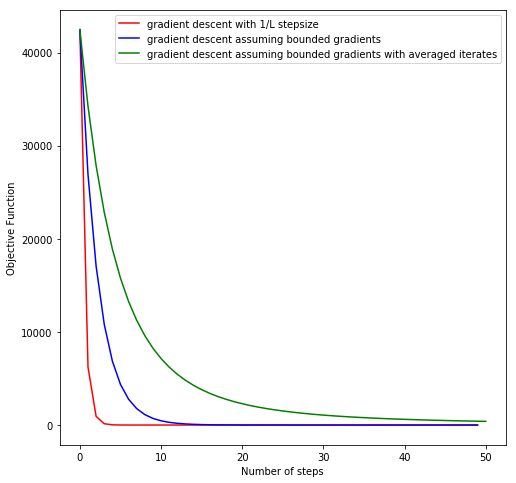

In [19]:
plt.figure(figsize=(8, 8))
plt.xlabel('Number of steps')
plt.ylabel('Objective Function')
#plt.yscale("log")
plt.plot(range(len(objectives)), objectives,'r', label='gradient descent with 1/L stepsize')
plt.plot(range(len(bd_objectives)), bd_objectives,'b', label='gradient descent assuming bounded gradients')
plt.plot(range(len(bd_objectives_averaged)), bd_objectives_averaged,'g', label='gradient descent assuming bounded gradients with averaged iterates')
plt.legend(loc='upper right')
plt.show()